In [29]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [5]:
clean=pd.read_csv("C:/Users/mitha/OneDrive/바탕 화면/clean_house_new.csv")

In [6]:
clean.head()

,일자,시도명,읍면동명,거주인구,근무인구,방문인구,총 유동인구,선불금액,배출량,데이터기준일자
0,2018-01-01,서귀포시,남원읍,291408.897,18744.131,219588.857,529741.884,1239600,37110,2020-12-15
1,2018-01-02,서귀포시,남원읍,290944.660,27781.676,166779.581,485505.917,1569850,47002,2020-12-15
2,2018-01-03,서귀포시,남원읍,287121.506,27767.075,181151.435,496040.016,1405650,42080,2020-12-15
3,2018-01-04,서귀포시,남원읍,279036.104,27045.987,188198.647,494280.738,1390250,41610,2020-12-15
4,2018-01-05,서귀포시,남원읍,287205.972,24824.666,171332.544,483363.182,1585700,47485,2020-12-15


In [16]:
#target 제외한 데이터 뽑기
clean_data=clean.drop(['배출량'],axis=1)

In [17]:
clean_data.describe()

,거주인구,근무인구,방문인구,총 유동인구,선불금액
count,3.506100e+04,3.506100e+04,3.506100e+04,3.506100e+04,3.506100e+04
mean,6.518522e+05,7.442573e+04,3.802742e+05,1.106552e+06,3.596514e+06
std,9.269565e+05,1.439585e+05,3.855309e+05,1.402412e+06,4.147693e+06
min,1.861110e+04,3.714420e+02,8.605600e+03,3.697177e+04,0.000000e+00
25%,1.430355e+05,1.622876e+04,1.532463e+05,3.249079e+05,9.439000e+05
50%,2.909064e+05,3.518748e+04,2.281100e+05,5.705062e+05,2.030649e+06
75%,7.703053e+05,7.307149e+04,4.989126e+05,1.335673e+06,4.396100e+06
max,5.846828e+06,1.633350e+06,3.802571e+06,9.183407e+06,2.686595e+07


In [18]:
x_data=clean[['거주인구','근무인구','방문인구','총 유동인구','선불금액']]
x_data.head()

,거주인구,근무인구,방문인구,총 유동인구,선불금액
0,291408.897,18744.131,219588.857,529741.884,1239600
1,290944.660,27781.676,166779.581,485505.917,1569850
2,287121.506,27767.075,181151.435,496040.016,1405650
3,279036.104,27045.987,188198.647,494280.738,1390250
4,287205.972,24824.666,171332.544,483363.182,1585700


In [19]:
x_data_new=sm.add_constant(x_data,has_constant='add')
#상수항 추가

In [20]:
target=clean[['배출량']]

In [21]:
multi_model=sm.OLS(target,x_data_new)
fitted_multi_model=multi_model.fit()

In [22]:
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    배출량   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.658e+07
Date:                Thu, 19 Aug 2021   Prob (F-statistic):               0.00
Time:                        18:53:25   Log-Likelihood:            -3.1642e+05
No. Observations:               35061   AIC:                         6.329e+05
Df Residuals:                   35055   BIC:                         6.329e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -119.3907     16.951     -7.043      0.000    -152.614     -86.167
거주인구        2.189e+04   1.85e+04      1.184      0.236   -1.44e+04    5.81e+04
근무인구        2.189e+04   1.85e+04      1.184      0.236   -1.44e+04    5.81e+04
방문인구        2.189e+04   1.85e+04      1.184      0.236   -1.44e+04    5.81e+04
총 유동인구     -2.189e+04   1.85e+04     -1.184      0.236   -5.81e+04    1.44e+04
선불금액           0.0298   3.22e-06   9255.681      0.000       0.030       0.030
==============================================================================
Omnibus:                   114541.883   Durbin-Watson:                   1.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      27899929817.087
Skew:                          55.600   Prob(JB):                         0.00
Kurtosis:                    4371.722   Cond. No.                     1.98e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- 뭐야 개구려

In [23]:
x_data1=clean[['거주인구']]
x_data1_new=sm.add_constant(x_data1,has_constant='add')
multi_model1=sm.OLS(target,x_data1)
fitted_multi_model1=multi_model1.fit()
fitted_multi_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    배출량   R-squared (uncentered):                   0.547
Model:                            OLS   Adj. R-squared (uncentered):              0.547
Method:                 Least Squares   F-statistic:                          4.237e+04
Date:                Thu, 19 Aug 2021   Prob (F-statistic):                        0.00
Time:                        18:53:58   Log-Likelihood:                     -4.5680e+05
No. Observations:               35061   AIC:                                  9.136e+05
Df Residuals:                   35060   BIC:                                  9.136e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
거주인구           0.1069      0.001    205.829      0.000       0.106       0.108
==============================================================================
Omnibus:                     3067.660   Durbin-Watson:                   0.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20695.870
Skew:                           0.067   Prob(JB):                         0.00
Kurtosis:                       6.762   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
x_data2=clean[['거주인구','근무인구']]
x_data2_new=sm.add_constant(x_data2,has_constant='add')
multi_model2=sm.OLS(target,x_data2)
fitted_multi_model2=multi_model2.fit()
fitted_multi_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    배출량   R-squared (uncentered):                   0.558
Model:                            OLS   Adj. R-squared (uncentered):              0.558
Method:                 Least Squares   F-statistic:                          2.211e+04
Date:                Thu, 19 Aug 2021   Prob (F-statistic):                        0.00
Time:                        18:54:43   Log-Likelihood:                     -4.5639e+05
No. Observations:               35061   AIC:                                  9.128e+05
Df Residuals:                   35059   BIC:                                  9.128e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
거주인구           0.1335      0.001    126.984      0.000       0.131       0.136
근무인구          -0.2135      0.007    -29.038      0.000      -0.228      -0.199
==============================================================================
Omnibus:                     3045.316   Durbin-Watson:                   0.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19085.368
Skew:                           0.142   Prob(JB):                         0.00
Kurtosis:                       6.603   Cond. No.                         14.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
x_data3=clean[['거주인구','방문인구']]
x_data3_new=sm.add_constant(x_data3,has_constant='add')
multi_model3=sm.OLS(target,x_data3)
fitted_multi_model3=multi_model3.fit()
fitted_multi_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    배출량   R-squared (uncentered):                   0.569
Model:                            OLS   Adj. R-squared (uncentered):              0.569
Method:                 Least Squares   F-statistic:                          2.316e+04
Date:                Thu, 19 Aug 2021   Prob (F-statistic):                        0.00
Time:                        18:55:36   Log-Likelihood:                     -4.5593e+05
No. Observations:               35061   AIC:                                  9.119e+05
Df Residuals:                   35059   BIC:                                  9.119e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
거주인구           0.0590      0.001     47.631      0.000       0.057       0.061
방문인구           0.1097      0.003     42.293      0.000       0.105       0.115
==============================================================================
Omnibus:                     2826.227   Durbin-Watson:                   0.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12433.488
Skew:                           0.288   Prob(JB):                         0.00
Kurtosis:                       5.860   Cond. No.                         6.13
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
x_data.corr()

,거주인구,근무인구,방문인구,총 유동인구,선불금액
거주인구,1.000000,0.837687,0.873578,0.987113,0.587472
근무인구,0.837687,1.000000,0.812652,0.879742,0.438790
방문인구,0.873578,0.812652,1.000000,0.935736,0.512915
총 유동인구,0.987113,0.879742,0.935736,1.000000,0.574349
선불금액,0.587472,0.438790,0.512915,0.574349,1.000000


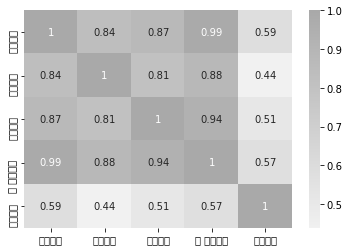

In [30]:
#상관행렬 시각화
import seaborn as sns
camp=sns.light_palette('darkgray',as_cmap=True)
sns.heatmap(x_data.corr(),annot=True,cmap=camp)
plt.show()